<a href="https://colab.research.google.com/github/benbatman/CNN_Projects/blob/main/PyTorch_MNIST_Exercises_with_wandb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import dependencies 
import torch 
from torch import nn 

import torchvision 
from torchvision import datasets 
from torchvision.transforms import ToTensor 
from torch.utils.data import DataLoader 


import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from tqdm.auto import tqdm 

print(f"PyTorch Version: {torch.__version__}")

PyTorch Version: 1.12.1+cu113


In [2]:
!pip install wandb
import wandb
wandb.login()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 12.0 MB/s 
     |████████████████████████████████| 168 kB 11.6 MB/s 
     |████████████████████████████████| 182 kB 43.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 168 kB 72.6 MB/s 
     |████████████████████████████████| 166 kB 72.6 MB/s 
     |████████████████████████████████| 166 kB 74.2 MB/s 
     |████████████████████████████████| 162 kB 71.9 MB/s 
     |████████████████████████████████| 162 kB 75.5 MB/s 
     |████████████████████████████████| 158 kB 71.4 MB/s 
     |████████████████████████████████| 157 kB 72.5 MB/s 
     |████████████████████████████████| 157 kB 74.6 MB/s 
     |████████████████████████████████| 157 kB 68.8 MB/s 
     |████████████████████████████████| 157 kB 71.7 MB/s 
     |████████████████████████████████| 157 kB 60.6 MB/s 
     |███████████████████████████

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
# Get training data 
train_data = datasets.MNIST(
    root='data', 
    train=True, 
    download=True, 
    transform=ToTensor(), # turns PIL images into Torch tensors
    target_transform=None
)

# Get test data 
test_data = datasets.MNIST( 
    root='data',
    train=False, 
    download=True,
    transform=ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [4]:
# Check first training sample 
image, label = train_data[0]
image, label 

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [5]:
# Check shape 
image.shape # CHW 

torch.Size([1, 28, 28])

In [6]:
# How many samples 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

Image shape: torch.Size([1, 28, 28])


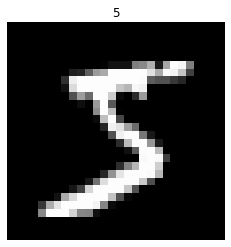

In [8]:
# Plot one of the images 
image, label = train_data[0] 
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap='gray')
plt.title(label) 
plt.axis(False);

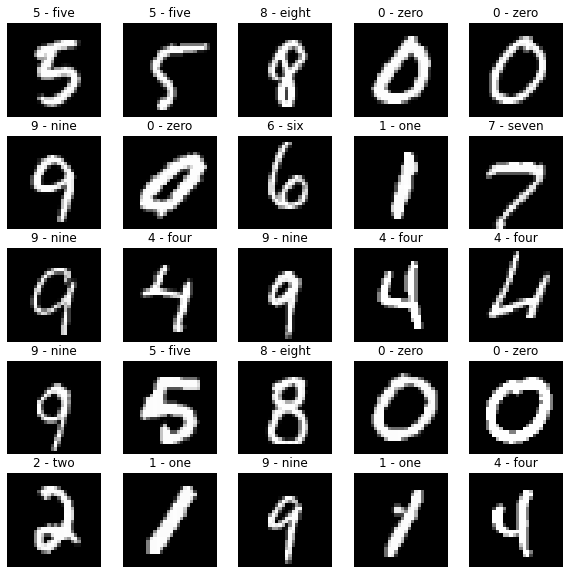

In [9]:
# Plot multiple images at once 
fig = plt.figure(figsize=(10,10))
rows, cols = 5,5 
for i in range(1, rows*cols+1):
  rand_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[rand_idx] 
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

In [10]:
from torch.utils.data import DataLoader 

BATCH_SIZE = 32 

# Turn datasets into iterables 
train_dataloader = DataLoader(train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True # shuffle data every epoch
                              )

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE, 
                             shuffle=False # doesn't need to be shuffled
                             )

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")


Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f130000cc50>, <torch.utils.data.dataloader.DataLoader object at 0x7f130000cbd0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

## Model 0 : Baseline Model 

- Model has no linearity (i.e. only linear layers and no non-linear activation functions)

In [12]:
# Set up device agnostic code 
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [13]:
from torch import nn 
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [14]:
# set up model with input parameters
model_0 = MNISTModelV0(input_shape=784, 
                       hidden_units=32, 
                       output_shape=len(class_names))

model_0.to(device)

MNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=32, bias=True)
    (2): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [15]:
import requests 
from pathlib import Path 

request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
with open("helper_functions.py", "wb") as f:
  f.write(request.content)

In [16]:
# accuracy function gotten from ZTM PyTorch course
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

In [17]:
# Set up loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [18]:
# Number of batches in our data
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [19]:
from tqdm.auto import tqdm 

epochs = 5

# Create training and testing loop 
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_loss = 0 
  # Loop through training batches 
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    # Put on target device 
    X, y = X.to(device), y.to(device)
    # 1. Forward pass 
    y_pred = model_0(X) 

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y) 
    train_loss += loss # accumulatively add up the loss per epoch

    # 3. Optimizer zero grad 
    optimizer.zero_grad() 

    # 4. Loss backward 
    loss.backward() 

    # 5. Optimizer step 
    optimizer.step() 

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader) 

  ### Testing 
  # Set up variables for accumulatively adding up loss and accuracy 
  test_loss, test_acc = 0,0 
  model_0.eval() 
  with torch.inference_mode():
    for X, y in test_dataloader:
      # Put on target device 
      X, y = X.to(device), y.to(device)
      # 1. Forward pass 
      test_pred = model_0(X) 

      # 2. Calculate loss 
      test_loss += loss_fn(test_pred, y) # Accumulatively add up the loss per epcoh 

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(test_dataloader)

    test_acc /= len(test_dataloader)

    # Print out what's happening 
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.81232 | Test loss: 0.40907, Test acc: 89.04
Epoch: 1
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.38584 | Test loss: 0.33594, Test acc: 90.59
Epoch: 2
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.34045 | Test loss: 0.31262, Test acc: 91.17
Epoch: 3
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.32053 | Test loss: 0.29985, Test acc: 91.71
Epoch: 4
---------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples

## Predictions and Model_0 results

In [20]:
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device): 

  """
  Returns a dictionary with the model results predicted on a data_loader
  """

  loss, acc = 0,0     # Zero out loss and accuracy 
  model.eval() # model in evaluation mode
  with torch.inference_mode():
    for X, y in data_loader:
      # Send data to target device 
      X, y = X.to(device), y.to(device)
      # Make predictions with the model 
      y_pred = model(X) 

      # Accumulate the loss and accuracy values per batch 
      loss += loss_fn(y_pred, y) 
      acc += accuracy_fn(y_true=y, 
                          y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find average loss/acc per batch
    loss /= len(data_loader) # loss divided by # of batches
    acc /= len(data_loader) # accuracy divided by # of batches

  return {"model_name": model.__class__.__name__, 
          "model_loss": loss.item(), 
          "model_acc": acc} 

In [21]:
# Calculate model 0 results on the test dataset 
model_0_results = eval_model(model=model_0, 
                              data_loader=test_dataloader,
                              loss_fn=loss_fn, 
                              accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.2938983738422394,
 'model_acc': 91.78314696485623}

## Model 1: Adding non-linearity

In [22]:
# Build model with ReLU activation functions (non-linear function) 
class MNISTModelV1(nn.Module): 
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int): 
    super().__init__() 
    self.layer_stack = nn.Sequential( 
        nn.Flatten(), # flatten inputs to 1D feature vector 
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(), # non-linear activation function 
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [23]:
model_1 = MNISTModelV1(input_shape=784, 
                       hidden_units=32, 
                       output_shape=len(class_names)).to(device) # output_shape must match number of classes in our dataset
                       

In [24]:
# Check device
next(model_1.parameters()).device

device(type='cuda', index=0)

In [25]:
# Set up loss, optimier and evaluation metrics 
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.SGD(params=model_1.parameters(),
                             lr=0.01)

In [26]:
# Build training and testing functions 
# Function originally built in ZTM PyTorch course by Daniel Bourke

def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               optimizer: torch.nn.Module, 
               loss_fn: torch.nn.Module,
               accuracy_fn=accuracy_fn, 
               device: torch.device = device):
  """ 
  Iterates over a data_loader and returns the training loss and accuracy

  Args:
  --------

  Returns: 
  --------
  """

  train_loss, train_acc = 0,0 # zero out training loss and accuracy 
  for batch, (X,y) in enumerate(data_loader): # enumerate will iterate through the batches in data_loader
    # Send data to GPU (if available) 
    X, y = X.to(device), y.to(device) 

    # 1. Forward pass 
    y_pred = model(X) 

    # 2. Calculate loss 
    loss = loss_fn(y_pred, y) 
    train_loss += loss 
    train_acc += accuracy_fn(y_true=y, 
                             y_pred=y_pred.argmax(dim=1)) # logits -> pred labels

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward() 

    # 5. Optimizer step 
    optimizer.step() 

  # Get loss and accuracy per epoch
  train_loss /= len(data_loader) 
  train_acc /= len(data_loader) 

  print(f"Train loss: {train_loss} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader, 
              model: torch.nn.Module, 
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device): 
    
  test_loss, test_acc = 0,0 
  model.eval() # model in eval mode 
  # Turn on inference context manager
  with torch.inference_mode(): 
    for X, y in data_loader: 
      # Send data to GPU 
      X, y = X.to(device), y.to(device)

      # 1. Forward pass 
      test_pred = model(X) # get predictions 

      # 2. Calculate loss and accuracy 
      test_loss += loss_fn(test_pred, y) 
      test_acc += accuracy_fn(y_true=y, 
                              y_pred=test_pred.argmax(dim=1)) # logits -> pred labels
      
    # Adjust metrics and print out 
    test_loss /= len(data_loader) 
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")


In [27]:
# Set number of epochs
epochs = 5 

# Iterate over epochs 
for epoch in tqdm(range(epochs)): 
  print(f"Epoch: {epoch}\n-------")
  train_step(data_loader=train_dataloader, 
             model=model_1, 
             loss_fn=loss_fn, 
             optimizer=optimizer,  
             accuracy_fn=accuracy_fn
             )

  test_step(data_loader=test_dataloader,  
            model=model_1,  
            loss_fn=loss_fn,  
            accuracy_fn=accuracy_fn,  
            ) 

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.3103960752487183 | Train accuracy: 62.60%
Test loss: 0.88191 | Test accuracy: 72.25%

Epoch: 1
-------
Train loss: 0.661980926990509 | Train accuracy: 80.62%
Test loss: 0.37680 | Test accuracy: 89.79%

Epoch: 2
-------
Train loss: 0.3477233648300171 | Train accuracy: 90.27%
Test loss: 0.30998 | Test accuracy: 91.38%

Epoch: 3
-------
Train loss: 0.30486929416656494 | Train accuracy: 91.31%
Test loss: 0.28275 | Test accuracy: 92.32%

Epoch: 4
-------
Train loss: 0.28012925386428833 | Train accuracy: 92.09%
Test loss: 0.26556 | Test accuracy: 92.51%



In [28]:
# Get model_1 results
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,  
                             loss_fn=loss_fn,  
                             accuracy_fn=accuracy_fn,  
                             device=device)
model_1_results

{'model_name': 'MNISTModelV1',
 'model_loss': 0.2655579745769501,
 'model_acc': 92.51198083067092}

In [29]:
model_0_results

{'model_name': 'MNISTModelV0',
 'model_loss': 0.2938983738422394,
 'model_acc': 91.78314696485623}

## Model 2: Conv2D model

In [30]:
# Build convolutoinal model
class MNISTModelV2(nn.Module): 
  def __init__(self, input_shape: int, hidden_units, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential( 
        nn.Conv2d(in_channels=input_shape,  
                  out_channels=hidden_units, 
                  kernel_size=3, 
                  stride=1, 
                  padding=1),
    nn.ReLU(), 
    nn.MaxPool2d(kernel_size=2, 
                 stride=2)
    )

    self.block_2 = nn.Sequential( 
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1), 
        nn.ReLU(), 
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1), 
        nn.ReLU(), 
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential( 
        nn.Flatten(), 
        nn.Linear(in_features=hidden_units*7*7, # 7 because we have two nn.MaxPool2d layers before this
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x) 
    x = self.block_2(x) 
    x = self.classifier(x) 
    return x 

In [31]:
model_2 = MNISTModelV2(input_shape=1, 
                       hidden_units=10, 
                       output_shape=len(class_names)).to(device)
model_2

MNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [32]:
model_2.state_dict()

OrderedDict([('block_1.0.weight', tensor([[[[-0.2624,  0.2086,  0.2425],
                        [ 0.0737, -0.2436, -0.1582],
                        [ 0.0058,  0.0077,  0.2591]]],
              
              
                      [[[ 0.1696,  0.0251,  0.2840],
                        [-0.3211, -0.3072,  0.2903],
                        [ 0.3039, -0.0942, -0.2749]]],
              
              
                      [[[-0.2078, -0.1701, -0.2296],
                        [ 0.0914, -0.0870, -0.3041],
                        [ 0.1297,  0.2657,  0.0896]]],
              
              
                      [[[-0.1830,  0.1187, -0.2670],
                        [-0.1362, -0.3212,  0.0485],
                        [ 0.2693,  0.1619, -0.2789]]],
              
              
                      [[[-0.1103, -0.1032,  0.2026],
                        [-0.1186, -0.1156,  0.0677],
                        [-0.2812, -0.0764,  0.0847]]],
              
              
                      [[[

In [33]:
# Set up loss and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [34]:
device

'cuda'

In [35]:
# Train and test the model 
epochs = 5
for epoch in tqdm(range(epochs)): 
  print(f"Epoch: {epoch}\n")
  train_step(data_loader=train_dataloader,  
             model=model_2,  
             loss_fn=loss_fn,  
             optimizer=optimizer,  
             accuracy_fn=accuracy_fn,  
             device=device
             )
  
  test_step(data_loader=test_dataloader,  
            model=model_2,  
            loss_fn=loss_fn,   
            accuracy_fn=accuracy_fn,  
            device=device
            )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0

Train loss: 0.824308454990387 | Train accuracy: 72.26%
Test loss: 0.20337 | Test accuracy: 94.09%

Epoch: 1

Train loss: 0.1659243404865265 | Train accuracy: 95.02%
Test loss: 0.11769 | Test accuracy: 96.32%

Epoch: 2

Train loss: 0.11963875591754913 | Train accuracy: 96.34%
Test loss: 0.09772 | Test accuracy: 96.96%

Epoch: 3

Train loss: 0.09954871237277985 | Train accuracy: 96.90%
Test loss: 0.08068 | Test accuracy: 97.37%

Epoch: 4

Train loss: 0.08752189576625824 | Train accuracy: 97.28%
Test loss: 0.06963 | Test accuracy: 97.90%



In [36]:
# Get model_2 results 
model_2_results = eval_model(model=model_2,  
                             data_loader=test_dataloader,  
                             loss_fn=loss_fn,  
                             accuracy_fn=accuracy_fn
                             )

model_2_results

{'model_name': 'MNISTModelV2',
 'model_loss': 0.06963407248258591,
 'model_acc': 97.90335463258786}

## Model 3
- Using the Adam optimizer
- Deeper model

In [38]:
# Build convolutoinal model
class MNISTModelV3(nn.Module): 
  def __init__(self, input_shape: int, hidden_units, output_shape: int):
    super().__init__()
    self.block_1 = nn.Sequential( 
        nn.Conv2d(in_channels=input_shape,  
                  out_channels=hidden_units, 
                  kernel_size=3, 
                  stride=1, 
                  padding=1),
    nn.ReLU(), 
    nn.MaxPool2d(kernel_size=2, 
                 stride=2)
    )

    self.block_2 = nn.Sequential( 
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1), 
        nn.ReLU(), 
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1), 
        nn.ReLU(), 
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential( 
        nn.Flatten(), 
        nn.Linear(in_features=hidden_units*7*7, # 7 because we have two nn.MaxPool2d layers before this
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block_1(x) 
    x = self.block_2(x) 
    x = self.classifier(x) 
    return x 

In [39]:
model_3 = MNISTModelV3(input_shape=1, 
                       hidden_units=32, 
                       output_shape=len(class_names))
model_3.to(device) 
model_3

MNISTModelV3(
  (block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1568, out_features=10, bias=True)
  )
)

In [40]:
# Set up loss function and optimizer 
loss_fn = nn.CrossEntropyLoss() 
optimizer = torch.optim.Adam(params=model_3.parameters(), 
                             lr=0.001)

In [41]:
# Train and test the model 
epochs = 5
for epoch in tqdm(range(epochs)): 
  print(f"Epoch: {epoch}\n------")
  train_step(data_loader=train_dataloader,  
             model=model_3,  
             loss_fn=loss_fn,  
             optimizer=optimizer,  
             accuracy_fn=accuracy_fn,  
             device=device
             )
  
  test_step(data_loader=test_dataloader,  
            model=model_3,  
            loss_fn=loss_fn,   
            accuracy_fn=accuracy_fn,  
            device=device
            )

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.14536647498607635 | Train accuracy: 95.45%
Test loss: 0.04485 | Test accuracy: 98.48%

Epoch: 1
------
Train loss: 0.04857658967375755 | Train accuracy: 98.50%
Test loss: 0.04310 | Test accuracy: 98.57%

Epoch: 2
------
Train loss: 0.03575116768479347 | Train accuracy: 98.88%
Test loss: 0.03927 | Test accuracy: 98.76%

Epoch: 3
------
Train loss: 0.027757856994867325 | Train accuracy: 99.14%
Test loss: 0.03084 | Test accuracy: 99.00%

Epoch: 4
------
Train loss: 0.022188737988471985 | Train accuracy: 99.29%
Test loss: 0.03523 | Test accuracy: 98.91%



In [42]:
model_3_results = eval_model(model=model_3, data_loader=test_dataloader, 
                             loss_fn=loss_fn, 
                             accuracy_fn=accuracy_fn,  
                             device=device)
model_3_results

{'model_name': 'MNISTModelV3',
 'model_loss': 0.03523235023021698,
 'model_acc': 98.91174121405751}

In [43]:
all_results = pd.DataFrame([model_0_results, model_1_results, model_2_results, model_3_results]) 
all_results

,model_name,model_loss,model_acc
0,MNISTModelV0,0.293898,91.783147
1,MNISTModelV1,0.265558,92.511981
2,MNISTModelV2,0.069634,97.903355
3,MNISTModelV3,0.035232,98.911741


Text(0, 0.5, 'Model')

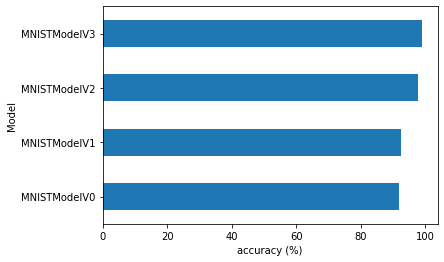

In [44]:
# Plot our accuracy results 
all_results.set_index("model_name")["model_acc"].plot(kind='barh')
plt.xlabel('accuracy (%)') 
plt.ylabel("Model")

In [45]:
# # A more intelligent visualization
# highest_acc = 0
# for accuracy_score in all_results['model_acc']:
#   if accuracy_score > highest_acc:
#     highest_acc = accuracy_score

In [46]:
all_results.set_index("model_name", inplace=True)

Text(0, 0.5, 'Model Version')

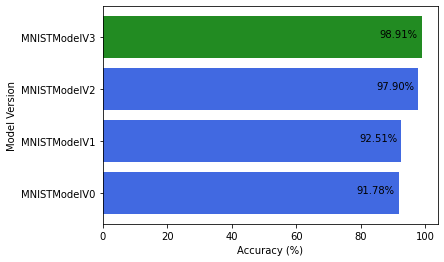

In [47]:
for i, acc_score in enumerate(all_results["model_acc"]):
  if acc_score == all_results['model_acc'].max():
    plt.barh(all_results.index[i], acc_score, color='forestgreen')
    plt.text(x=acc_score-13, y=i, s=str(f"{acc_score:.2f}%"))
  else: 
    plt.barh(all_results.index[i], acc_score, color='royalblue')
    plt.text(x=acc_score-13, y=i, s=str(f"{acc_score:.2f}%"))

plt.xlabel("Accuracy (%)")
plt.ylabel("Model Version")

In [48]:
# Create a function to make predictions (from ZTM PyTorch course) 
def make_predictions(model: torch.nn.Module, data: list, device: torch.device=device):
  pred_probs=[] # empty list for prediction probabilities
  model.eval() # put model into evaluation mode
  with torch.inference_mode():
    for sample in data: 
      # Prepare sample 
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model will output raw logits) 
      pred_logit = model(sample)  

      # Get prediction probability (logit -> prediction probability) 
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off GPU for further calculation 
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor 
  return torch.stack(pred_probs)

In [49]:
import random 
test_samples = [] 
test_labels = [] 
for sample, label in random.sample(list(test_data), k=9): 
  test_samples.append(sample) 
  test_labels.append(label) 

# View the first test sample and label 
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]}")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 8


In [50]:
# Make predictions on test samples with model 2 (our best performing model) 
pred_probs = make_predictions(model=model_3, 
                              data=test_samples)  

# View first two prediction probabilities list 
pred_probs[:2] 

tensor([[1.1619e-06, 5.6201e-12, 1.1384e-08, 3.2477e-08, 2.5675e-08, 1.8814e-10,
         2.6758e-11, 9.6406e-11, 1.0000e+00, 1.0993e-06],
        [3.3134e-06, 1.7402e-14, 3.7411e-08, 1.2515e-07, 5.1493e-09, 7.8809e-07,
         9.9999e-01, 7.4626e-11, 9.5340e-06, 7.0718e-10]])

In [51]:
# Turn the prediction probabilities into prediction labels 
pred_classes = pred_probs.argmax(dim=1)  
pred_classes

tensor([8, 6, 8, 5, 0, 5, 7, 5, 3])

In [52]:
test_labels, pred_classes

([8, 6, 8, 5, 0, 3, 7, 5, 3], tensor([8, 6, 8, 5, 0, 5, 7, 5, 3]))

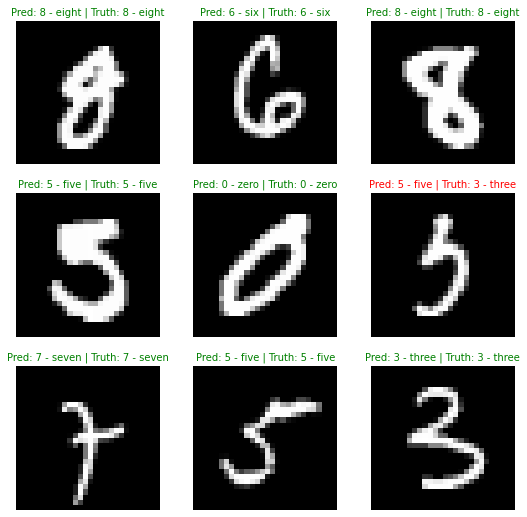

In [53]:
# Plot the predictions 
plt.figure(figsize=(9,9)) 
rows = 3
cols = 3 
for i, sample in enumerate(test_samples): 
  # Create subplot 
  plt.subplot(rows, cols, i+1)

  # Plot the target image 
  plt.imshow(sample.squeeze(), cmap='gray') 

  # Find the prediction label
  pred_label = class_names[pred_classes[i]]

  # Ground truth 
  truth_label = class_names[test_labels[i]] 

  # Plot title
  title_text = (f"Pred: {pred_label} | Truth: {truth_label}") 

  
  # Check for equality and change the title color accordingly 
  if pred_label == truth_label: 
    plt.title(title_text, fontsize=10, c='g')
  else: 
    plt.title(title_text, fontsize=10, c='r')
  plt.axis(False)

## Make some predictions with Model_3

In [54]:
test_data.targets

tensor([7, 2, 1,  ..., 4, 5, 6])

In [55]:
from tqdm.auto import tqdm 

# 1. Make predictions with trained model 
y_preds = [] 
model_3.eval() 
with torch.inference_mode(): 
  for X, y in tqdm(test_dataloader, desc='Making Predictions'): 
    # Put data on target device 
    X, y = X.to(device), y.to(device) 
    # Do the forward pass 
    y_logit = model_2(X) 
    # Get prediction label 
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) 
    # Put prediction on CPU
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor 
y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [56]:
test_labels = test_data.targets
test_labels

tensor([7, 2, 1,  ..., 4, 5, 6])

## Plotting the incorrect predictions

In [57]:
import numpy as np  
# Get index positions of where our model predicted incorrectly 
incorrect_preds = np.where(y_pred_tensor != test_labels)[0] # gets index position
incorrect_preds[:10]

array([241, 247, 259, 320, 321, 359, 381, 449, 492, 582])

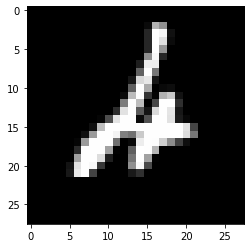

In [58]:
plt.imshow(test_data[247][0].squeeze(), cmap='gray')

In [60]:
random.sample(list(incorrect_preds), k=10)

[9692, 1319, 2648, 7208, 6608, 4690, 8408, 1364, 3808, 3597]

In [61]:
y_pred_tensor[9692]

tensor(7)

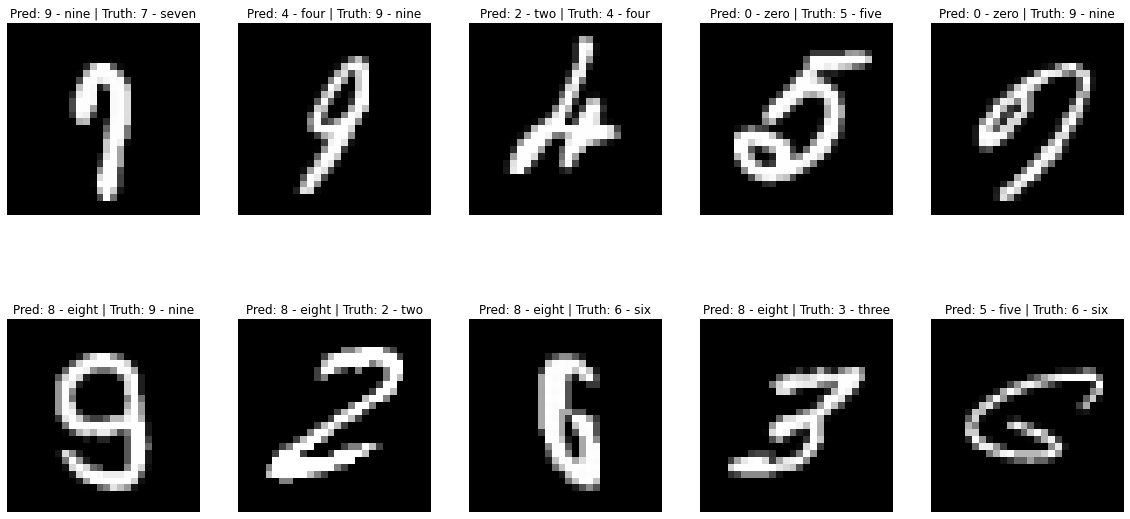

In [62]:
# Plot the incorrect predictions
fig = plt.figure(figsize=(20,10))
nrows = 2
ncols = 5
for i, idx in enumerate(random.sample(list(incorrect_preds), k=10)):
  image, label = test_data[idx]
  fig.add_subplot(nrows, ncols, i+1)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(f"Pred: {class_names[y_pred_tensor[idx].item()]} | Truth: {class_names[label]}")
  plt.axis(False)

In [69]:
# Updating train_step and test_step functions to work with wandb
def train_step(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               optimizer: torch.nn.Module, 
               loss_fn: torch.nn.Module,
               accuracy_fn=accuracy_fn, 
               device: torch.device = device):
  """ 
  Iterates over a data_loader and returns the training loss and accuracy
  """

  train_loss, train_acc = 0,0 # zero out training loss and accuracy 
  model.train() # put model in training mode
  for batch, (X,y) in enumerate(data_loader): # enumerate will iterate through the batches in data_loader
    # Send data to GPU (if available) 
    X, y = X.to(device), y.to(device) 

    # 1. Forward pass 
    y_pred = model(X) 

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_pred, y) 
    train_loss += loss 
    train_acc += accuracy_fn(y_true=y, 
                             y_pred=y_pred.argmax(dim=1)) # logits -> pred labels

    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    # 4. Loss backward 
    loss.backward() 
    # 5. Optimizer step 
    optimizer.step() 

  # Get loss and accuracy per epoch
  train_loss /= len(data_loader) 
  train_acc /= len(data_loader) 

  print(f"Train loss: {train_loss} | Train accuracy: {train_acc:.2f}%")

  train_metrics = {"train_loss": train_loss, 
                   "train_accuracy": train_acc}

  wandb.log({**train_metrics})

def test_step(data_loader: torch.utils.data.DataLoader, 
              model: torch.nn.Module, 
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device: torch.device = device): 
    
  test_loss, test_acc = 0,0 
  model.eval() # model in eval mode 
  # Turn on inference context manager
  with torch.inference_mode(): 
    for X, y in data_loader: 
      # Send data to GPU 
      X, y = X.to(device), y.to(device)

      # 1. Forward pass 
      test_pred = model(X) # get predictions 

      # 2. Calculate loss and accuracy 
      test_loss += loss_fn(test_pred, y) 
      test_acc += accuracy_fn(y_true=y, 
                              y_pred=test_pred.argmax(dim=1)) # logits -> pred labels
      
    # Adjust metrics and print out 
    test_loss /= len(data_loader) 
    test_acc /= len(data_loader)

    test_metrics = {"test_loss": test_loss, 
                    "test_acc": test_acc}

    print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

  wandb.log({**test_metrics})

In [68]:
# Run 5 experiments, only differing the learning rate
for i in range(5): 
  # Initialize a wandb run 
  wandb.init(
      project='PyTorch_MNIST_Models', 
      config={
          'epochs': 3,
          'batch_size': 32, 
          'lr': list([0.01, 0.005, 0.001, 0.005, 0.0001]),
          'hidden_units': 32  
      })
  # Copy config
  config = wandb.config

  # Turn datasets into iterables 
  train_dataloader = DataLoader(train_data, 
                              batch_size=config.batch_size, 
                              shuffle=True # shuffle data every epoch
                              )

  test_dataloader = DataLoader(test_data,
                             batch_size=config.batch_size, 
                             shuffle=False # doesn't need to be shuffled
                             )

  # Instantiate the model
  model = MNISTModelV3(input_shape=1, 
                        hidden_units=config.hidden_units, 
                        output_shape=len(class_names))
  model.to(device)
  
  # Create loss and optimizer functions 
  loss_fn = nn.CrossEntropyLoss() 
  optimizer = torch.optim.Adam(model.parameters(), lr=config.lr[i])

  # Training and testing
  for epoch in tqdm(range(config.epochs)): 
    print(f"Epoch: {epoch}\n------")
    train_step(data_loader=train_dataloader,  
                model=model,  
                loss_fn=loss_fn,  
                optimizer=optimizer,  
                accuracy_fn=accuracy_fn,  
                device=device
                )

    test_step(data_loader=test_dataloader,  
              model=model,  
              loss_fn=loss_fn,   
              accuracy_fn=accuracy_fn,  
              device=device
              )

  # Close out the wandb run
  wandb.finish()

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.2529435455799103 | Train accuracy: 92.10%
Test loss: 0.15249 | Test accuracy: 94.94%

Epoch: 1
------
Train loss: 0.12251285463571548 | Train accuracy: 96.34%
Test loss: 0.09891 | Test accuracy: 96.91%

Epoch: 2
------
Train loss: 0.10749579221010208 | Train accuracy: 96.79%
Test loss: 0.10561 | Test accuracy: 96.91%



test_acc,▁██
test_loss,█▁▂
train_accuracy,▁▇█
train_loss,█▂▁
test_acc,96.91494
test_loss,0.10561
train_accuracy,96.79
train_loss,0.1075


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.1273512989282608 | Train accuracy: 96.11%
Test loss: 0.05013 | Test accuracy: 98.62%

Epoch: 1
------
Train loss: 0.058146994560956955 | Train accuracy: 98.19%
Test loss: 0.05533 | Test accuracy: 98.16%

Epoch: 2
------
Train loss: 0.04464947059750557 | Train accuracy: 98.64%
Test loss: 0.05865 | Test accuracy: 98.17%



test_acc,█▁▁
test_loss,▁▅█
train_accuracy,▁▇█
train_loss,█▂▁
test_acc,98.17292
test_loss,0.05865
train_accuracy,98.64167
train_loss,0.04465


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.14737264811992645 | Train accuracy: 95.45%
Test loss: 0.05825 | Test accuracy: 98.02%

Epoch: 1
------
Train loss: 0.05035887658596039 | Train accuracy: 98.44%
Test loss: 0.04445 | Test accuracy: 98.55%

Epoch: 2
------
Train loss: 0.037702303379774094 | Train accuracy: 98.83%
Test loss: 0.03664 | Test accuracy: 98.88%



test_acc,▁▅█
test_loss,█▄▁
train_accuracy,▁▇█
train_loss,█▂▁
test_acc,98.88179
test_loss,0.03664
train_accuracy,98.82667
train_loss,0.0377


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.14363425970077515 | Train accuracy: 95.52%
Test loss: 0.05015 | Test accuracy: 98.24%

Epoch: 1
------
Train loss: 0.06329818069934845 | Train accuracy: 98.11%
Test loss: 0.05565 | Test accuracy: 98.11%

Epoch: 2
------
Train loss: 0.054139334708452225 | Train accuracy: 98.37%
Test loss: 0.04339 | Test accuracy: 98.64%



test_acc,▃▁█
test_loss,▅█▁
train_accuracy,▁▇█
train_loss,█▂▁
test_acc,98.64217
test_loss,0.04339
train_accuracy,98.37
train_loss,0.05414


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.46511080861091614 | Train accuracy: 86.07%
Test loss: 0.18492 | Test accuracy: 94.48%

Epoch: 1
------
Train loss: 0.1423397660255432 | Train accuracy: 95.75%
Test loss: 0.09282 | Test accuracy: 97.19%

Epoch: 2
------
Train loss: 0.09171422570943832 | Train accuracy: 97.27%
Test loss: 0.06915 | Test accuracy: 97.93%



test_acc,▁▇█
test_loss,█▂▁
train_accuracy,▁▇█
train_loss,█▂▁
test_acc,97.93331
test_loss,0.06915
train_accuracy,97.27167
train_loss,0.09171
